In [ ]:
import tensorflow as tf
from keras import Sequential,layers
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import time
import keras

In [ ]:
base_models = [
    tf.keras.applications.VGG16(
    input_shape=(128,128,3),
    include_top=False),
    
    tf.keras.applications.InceptionResNetV2(
    input_shape=(128,128,3),
    include_top=False),
   
    tf.keras.applications.DenseNet201(
    input_shape=(128,128,3),
    include_top=False),
   
    tf.keras.applications.EfficientNetB0(
    input_shape=(128,128,3),
    include_top=False),
]

16711680/16705208 [==============================] - 0s 0us/step


In [ ]:
summary = []

In [ ]:

for base_model in base_models:
  model = Sequential()
  model.add(base_model)
  model.add(layers.GlobalAveragePooling2D())
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(32,activation='relu'))
  model.add(layers.Dense(1))
  model.build((None,128,128,3))
  model.compile('adam',loss='mean_absolute_error',metrics=['accuracy', lr_metric])
  lr_decay =  tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=1,
    min_lr=0,
    mode="auto",
    cooldown=0)
  start_time = time.perf_counter()
  model.fit(X,y,batch_size=32,epochs=10,callbacks=[lr_decay],validation_split=0.25)
  end_time = time.perf_counter()
  summary.append((end_time-start_time,model.evaluate(X,y)))

Epoch 1/5
156/156 [==============================] - 37s 199ms/step - loss: 1739.7455 - val_loss: 617.6373
Epoch 2/5
156/156 [==============================] - 23s 149ms/step - loss: 677.0898 - val_loss: 771.1011
Epoch 3/5
156/156 [==============================] - 23s 148ms/step - loss: 616.9569 - val_loss: 507.6969
Epoch 4/5
156/156 [==============================] - 23s 150ms/step - loss: 591.6002 - val_loss: 483.9328
Epoch 5/5
208/208 [==============================] - 10s 50ms/step - loss: 632.5704
Epoch 1/5
156/156 [==============================] - 56s 262ms/step - loss: 2187.1683 - val_loss: 1513.4172
Epoch 2/5
156/156 [==============================] - 37s 240ms/step - loss: 983.1355 - val_loss: 1261.4943
Epoch 3/5
156/156 [==============================] - 39s 251ms/step - loss: 591.5151 - val_loss: 560.1676
Epoch 4/5
156/156 [==============================] - 39s 253ms/step - loss: 585.3187 - val_loss: 609.5845
Epoch 5/5
208/208 [==============================] - 14s 69ms/st

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Copy of new.csv')

In [ ]:
data.head()

,Patient,FVC
0,ID00007637202177411956430,2000
1,ID00009637202177434476278,3214
2,ID00010637202177584971671,2474
3,ID00011637202177653955184,3193
4,ID00012637202177665765362,2971


In [ ]:
path1 = '/content/drive/MyDrive/mask_coronal/'
path2 = '/content/drive/MyDrive/mask_sagittal/'

In [ ]:
X = []
y = []
for i in range(len(data)):
  id = data.iloc[i]['Patient']
  target = data.iloc[i]['FVC']
  for slice0 in os.listdir(path1+id):
    image = cv2.resize(cv2.imread(path1+id+'/'+slice0),(128,128))
    X.append(image)
    y.append(target)
  for slice0 in os.listdir(path2+id):
    image = cv2.resize(cv2.imread(path2+id+'/'+slice0),(128,128))
    X.append(image)
    y.append(target)

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
with open('test.npy', 'wb') as f:
    np.save(f, X)
    np.save(f, y)

In [ ]:
with open('/content/drive/MyDrive/test.npy', 'rb') as f:
    X = np.load(f)
    y = np.load(f)

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(128,128,3),
    include_top=False)

In [ ]:
model = Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1))
model.build((None,128,128,3))
model.compile(keras.optimizers.Adam(),loss='mean_absolute_error')


In [ ]:
print(end_time-start_time)

381.95429082699957


In [ ]:
start_time = time.perf_counter()
model.fit(X,y,batch_size=32,epochs=20,validation_split=0.25)
end_time = time.perf_counter()

Epoch 1/20
156/156 [==============================] - 42s 228ms/step - loss: 2032.7348 - val_loss: 654.4428
Epoch 2/20
156/156 [==============================] - 17s 109ms/step - loss: 480.0547 - val_loss: 550.0564
Epoch 3/20
156/156 [==============================] - 17s 109ms/step - loss: 419.5686 - val_loss: 598.0616
Epoch 4/20
156/156 [==============================] - 17s 111ms/step - loss: 416.9197 - val_loss: 593.1821
Epoch 5/20
156/156 [==============================] - 17s 110ms/step - loss: 409.5424 - val_loss: 570.8987
Epoch 6/20
156/156 [==============================] - 17s 110ms/step - loss: 411.2408 - val_loss: 559.1761
Epoch 7/20
156/156 [==============================] - 17s 109ms/step - loss: 409.5008 - val_loss: 569.0610
Epoch 8/20
156/156 [==============================] - 17s 110ms/step - loss: 413.5930 - val_loss: 584.5587
Epoch 9/20
156/156 [==============================] - 17s 109ms/step - loss: 390.9413 - val_loss: 596.8818
Epoch 10/20
156/156 [===============

In [ ]:
model.evaluate(X,y)

208/208 [==============================] - 5s 22ms/step - loss: 387.2209


387.2208557128906

In [ ]:
model.save_weights('/content/drive/MyDrive/_feature_.h5')

In [ ]:
feature_extractor = Sequential()
for i in range(4):
   feature_extractor.add(model.layers[i])

In [ ]:
feature_extractor.build((None,128,128,3))

In [ ]:
x.ravel().shape

(1280,)

In [ ]:
print(len(data))

171


In [ ]:
features = pd.DataFrame(columns=['id']+list(range(0,32*40)))

In [ ]:
list(np.zeros(10))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
qv = 0
for i in range(len(data)):
  d = []
  id = data.iloc[i]['Patient']
  target = data.iloc[i]['FVC']
  for slice0 in os.listdir(path1+id):
    image = cv2.resize(cv2.imread(path1+id+'/'+slice0),(128,128))
    d.append(image)
  for slice0 in os.listdir(path2+id):
    image = cv2.resize(cv2.imread(path2+id+'/'+slice0),(128,128))
    d.append(image)
  print(id,len(d))
  if len(d)!=0:
    d = np.array(d)
    x = feature_extractor.predict(d)
    z = [id]+list(x.ravel())
    if len(z) < 1281:
      z += list(np.zeros(1281 - len(z)))
    if len(z) > 1281:
      z = z[0:1281]
    features.loc[len(features)] = z
  else:
    z = [id]+list(np.zeros(1280))
    features.loc[len(features)] = z
    qv=qv+1
  print(len(features))

In [ ]:
features.to_csv('/content/drive/MyDrive/features.csv',index=False)

In [ ]:
features = pd.read_csv('/content/drive/MyDrive/features.csv')

In [ ]:
features.head()

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,ID00007637202177411956430,0.0,0.0,366.670807,393.150055,0.0,0.0,343.384369,0.0,352.586395,343.830200,0.0,343.418060,0.0,0.0,356.456146,415.979401,424.457520,0.0,347.098785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,354.213135,405.612640,0.0,369.112885,395.908173,0.0,0.0,309.489288,332.259918,0.0,0.0,289.987244,...,0.0,0.0,0.0,278.895996,319.503021,0.0,290.860168,311.460938,0.0,0.0,288.828583,310.166229,0.0,0.0,270.720947,0.0,278.063110,270.816895,0.0,270.793030,0.0,0.0,281.200684,327.670990,334.685394,0.0,273.467926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,279.219360,319.877960,0.0,291.180359,311.851898
1,ID00009637202177434476278,0.0,0.0,495.122955,529.257996,0.0,0.0,462.829376,0.0,476.145233,464.095062,0.0,463.250336,0.0,0.0,479.695221,562.204834,572.383789,0.0,468.522980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,477.957306,546.916443,0.0,497.553558,535.023926,0.0,0.0,506.968536,541.686096,0.0,0.0,473.780762,...,0.0,0.0,0.0,423.599121,484.823792,0.0,441.276489,473.944489,0.0,0.0,430.805878,461.068695,0.0,0.0,403.083069,0.0,414.443817,403.800659,0.0,403.261993,0.0,0.0,417.993561,489.024750,498.280090,0.0,407.700378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,415.943573,476.105927,0.0,433.324890,465.397858
2,ID00010637202177584971671,0.0,0.0,388.938568,416.908386,0.0,0.0,364.185577,0.0,373.975067,364.638367,0.0,364.227905,0.0,0.0,378.034058,441.280914,450.212585,0.0,368.148773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,375.810455,430.206390,0.0,391.503357,419.957428,0.0,0.0,459.742645,492.004639,0.0,0.0,430.105988,...,0.0,0.0,0.0,369.612244,423.160553,0.0,385.286926,413.202026,0.0,0.0,434.077026,464.740784,0.0,0.0,406.198364,0.0,417.663269,406.883270,0.0,406.344360,0.0,0.0,421.341614,492.710541,502.183594,0.0,410.771149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419.213318,479.811401,0.0,436.754303,468.908112
3,ID00011637202177653955184,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,ID00012637202177665765362,0.0,0.0,420.890411,450.809113,0.0,0.0,393.927521,0.0,404.811951,394.568573,0.0,394.036591,0.0,0.0,408.716888,477.641174,487.001709,0.0,398.326569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,406.535828,465.328278,0.0,423.503296,454.573334,0.0,0.0,424.080292,454.175537,0.0,0.0,396.874054,...,0.0,0.0,0.0,408.066589,467.103882,0.0,425.138947,456.483368,0.0,0.0,468.948242,501.545135,0.0,0.0,438.567535,0.0,451.105927,439.541779,0.0,438.853424,0.0,0.0,454.649017,532.441895,542.249268,0.0,443.760742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,452.754639,518.103210,0.0,471.472687,506.712372


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
array = features.drop('id',axis=1)

In [ ]:
array = np.array(array)

In [ ]:
array.shape

(171, 1280)

In [ ]:
pca = PCA(n_components=171,random_state=2021)

In [ ]:
array_pca = pca.fit_transform(array)

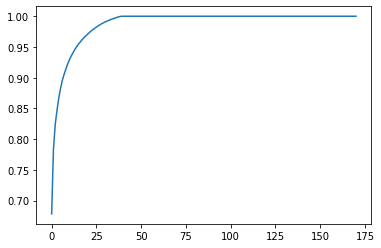

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
print(np.cumsum(pca.explained_variance_ratio_*100)[32])

In [ ]:
pca = PCA(n_components=32,random_state=2021)
array_pca = pca.fit_transform(array)

In [ ]:
array_pca.shape

In [ ]:
final_features = pd.DataFrame(columns=['Patient']+list(range(0,32)))

In [ ]:
for i in range(171):
  id = features.iloc[i]['id']
  z = [id]+list(array_pca[i])
  final_features.loc[len(final_features)] = z

In [ ]:
final_features.head()

In [ ]:
final_features.to_csv('/content/drive/MyDrive/final_features2.csv',index=False)